Initial Dataset:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Missing Values Before Handling:
 sepal_length    7
sepal_width     8
petal_length    7
petal_width     7
species         8
dtype: int64

Missing Values After Handling:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Dataset After Encoding:
    sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           

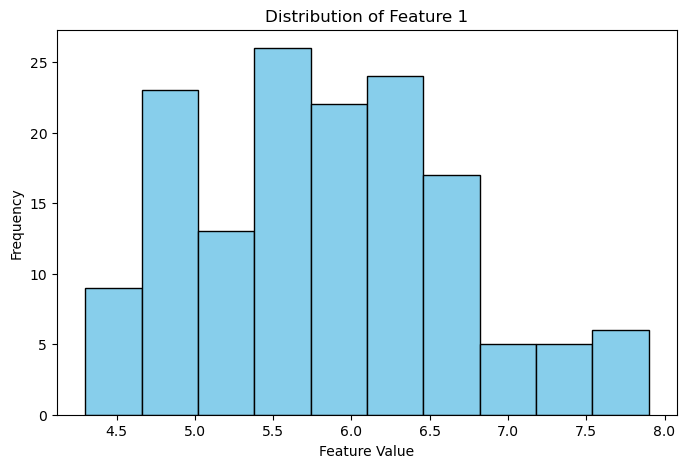

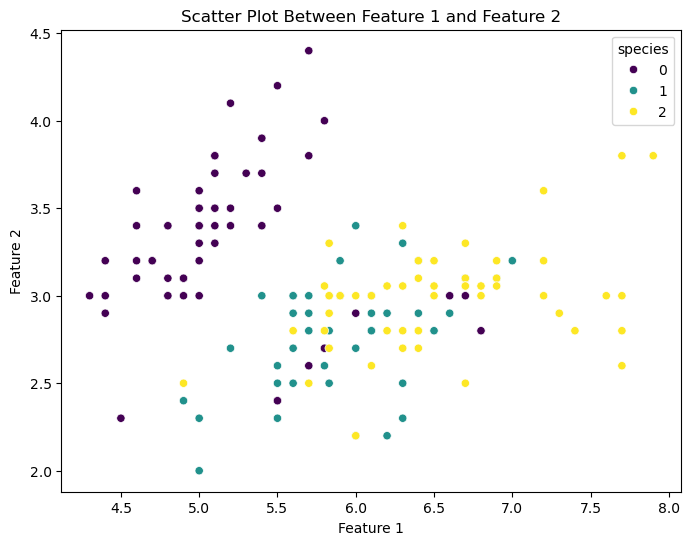

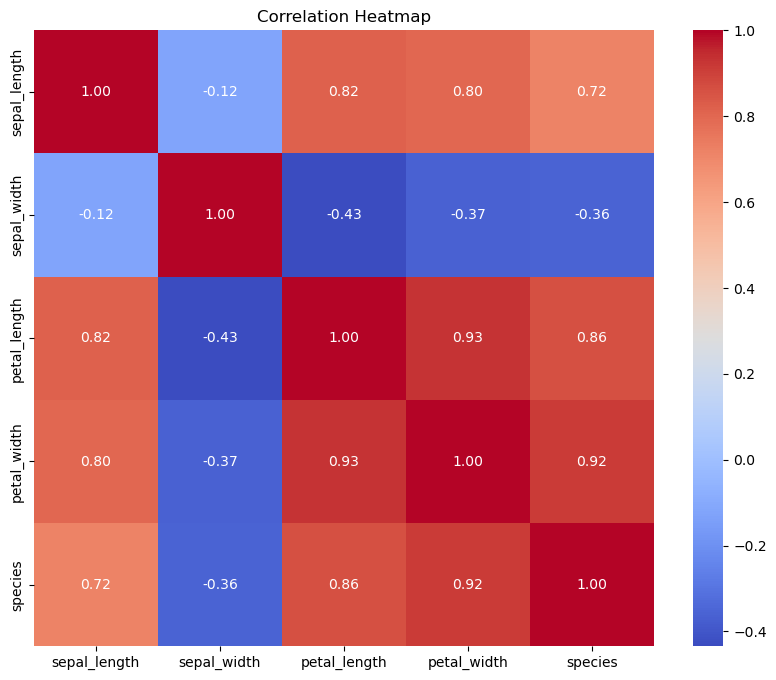

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
dataset_path = 'iris.csv'
df = pd.read_csv(dataset_path)

# Remove a random value from the dataset (for demonstration purposes)


# Display the first few rows of the dataset
print("Initial Dataset:\n", df.head())

# Step 1: Handle missing values
# Check for missing values
def handle_missing_values(dataframe):
    print("\nMissing Values Before Handling:\n", dataframe.isnull().sum())

    # Fill missing numerical values with mean and categorical with mode
    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            dataframe[column] = dataframe[column].fillna(dataframe[column].mode()[0])
        else:
            dataframe[column] = dataframe[column].fillna(dataframe[column].mean())

    print("\nMissing Values After Handling:\n", dataframe.isnull().sum())
    return dataframe

df = handle_missing_values(df)

# Step 2: Encode categorical data
# Use LabelEncoder for categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

print("\nDataset After Encoding:\n", df.head())

# Step 3: Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

print("\nDataset After Feature Scaling:\n", scaled_df.head())

# Step 4: Plot the distribution of a feature
plt.figure(figsize=(8, 5))
plt.hist(df.iloc[:, 0], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Feature 1')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()

# Step 5: Create scatter plots to understand relationships between features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df.iloc[:, -1], palette='viridis')
plt.title('Scatter Plot Between Feature 1 and Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Step 6: Use a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
